### Ejemplo de uso de tensorflow para predecir el dataset Iris

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import normalize

##### Lectura de datos
1. Carga de datos.
2. Codificación de target y.

In [3]:
data = datasets.load_iris()
labelBinarizer = LabelBinarizer()

dataset = pd.DataFrame(data.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
dataset['specie'] = data.target
Y = labelBinarizer.fit_transform(dataset.specie.values)

#### Normalización de los datos de entrada

In [4]:
X = dataset.columns[0:4]
X_data = dataset[X].values
X_data = normalize(X_data)


#### Dividir los datos en entrenamiento y test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y, random_state = 1)

#### Construcción de la red neural con tensorflow

La red neuronal propuesta tendrá dos capas de 256 y 128 neuronas respectivamente y una capa de salida.

In [30]:
learning_rate = 0.005
training_epochs = 10000
n_hidden1 = 25  # Number of neurons in layer 1
#n_hidden2 = 128 # Number of neurons in layer 2
n_input = X_train.shape[1] #Number of features (4)
n_classes = y_train.shape[1] #Number of classes to predict


In [31]:
X = tf.placeholder(shape=[None,n_input], dtype = tf.float32)
y = tf.placeholder(shape=[None,n_classes], dtype = tf.float32)

#Weights
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden1])),
    'out': tf.Variable(tf.random_normal([n_hidden1, n_classes]))
}

#Biases
biases = {
  'b1': tf.Variable(tf.random_normal([n_hidden1])),
  'out': tf.Variable(tf.random_normal([n_classes]))
}

#### Forward propagation

In [32]:
def forward_propagation(x):
    #Hidden layer 1.
    out_h1 = tf.nn.relu(tf.matmul(x,weights['h1'])+biases['b1'])    
    #Output layer
    out_layer = tf.matmul(out_h1, weights['out'])+biases['out']
    
    return out_layer

y_hat = forward_propagation(X)
y_predict = tf.argmax(y_hat, axis = 1) #Devuelve la columna con el mayor valor.
    


#### Backward propagation

In [33]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits =y_hat))
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op= optimizer.minimize(cost)

#### Entrenamiento de la red neuronal

In [16]:
    
    arrays = np.array([[0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.78258054, 0.38361791, 0.4603415 , 0.16879188],
       [0.76785726, 0.34902603, 0.51190484, 0.16287881],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.71578999, 0.34430405, 0.5798805 , 0.18121266],
       [0.72634846, 0.38046824, 0.54187901, 0.18446945],
       [0.73337886, 0.32948905, 0.54206264, 0.24445962],
       [0.76693897, 0.57144472, 0.28572236, 0.06015208]])
    
    print(arrays)

[[0.81120865 0.55945424 0.16783627 0.02797271]
 [0.78258054 0.38361791 0.4603415  0.16879188]
 [0.76785726 0.34902603 0.51190484 0.16287881]
 [0.79428944 0.57365349 0.19121783 0.05883625]
 [0.71578999 0.34430405 0.5798805  0.18121266]
 [0.72634846 0.38046824 0.54187901 0.18446945]
 [0.73337886 0.32948905 0.54206264 0.24445962]
 [0.76693897 0.57144472 0.28572236 0.06015208]]


In [35]:
from datetime import datetime
import matplotlib.pyplot as plt
import time

# Initializing the variables
init = tf.global_variables_initializer()
batch_size = 120
loss = []
start = time.time()
with tf.Session() as sess:
    sess.run(init)
    
    #writer.add_graph(sess.graph)
    #EPOCHS
    for epoch in range(training_epochs):
        size = np.random.choice(len(X_train),batch_size)

        x_batch = X_train[size]
        y_batch = y_train[size]

        summary = sess.run(train_op, feed_dict={X: x_batch, y: y_batch})
        
        train_accuracy = np.mean(np.argmax(y_train, axis=1) == sess.run(y_predict, feed_dict={X: X_train, y: y_train}))
        test_accuracy  = np.mean(np.argmax(y_test, axis=1) == sess.run(y_predict, feed_dict={X: X_test, y: y_test}))
        loss.append(sess.run(cost, feed_dict={X: X_train, y: y_train}))
        if ((epoch +1 ) % 1000 == 0):
            print("Epoch = %d, train accuracy = %.2f%%, test accuracy = %.2f%%" % (epoch + 1, 100. * train_accuracy, 100. * test_accuracy))

    
   # print(sess.run(forward_propagation([[1.,1.,1.,1.]])))

    #Realización de predicción con los vectores de pesos entrenados.
    sum = 0
    for array in arrays:
        print(sess.run(tf.argmax(forward_propagation(np.float32(array.reshape(1,4))),axis=1)))
 
    sess.close()

    end = time.time()
    
    print("Total time: {0}".format(end - start))

Epoch = 1000, train accuracy = 90.18%, test accuracy = 86.84%
Epoch = 2000, train accuracy = 95.54%, test accuracy = 92.11%
Epoch = 3000, train accuracy = 96.43%, test accuracy = 97.37%
Epoch = 4000, train accuracy = 96.43%, test accuracy = 97.37%
Epoch = 5000, train accuracy = 96.43%, test accuracy = 100.00%
Epoch = 6000, train accuracy = 96.43%, test accuracy = 100.00%
Epoch = 7000, train accuracy = 96.43%, test accuracy = 100.00%
Epoch = 8000, train accuracy = 96.43%, test accuracy = 97.37%
Epoch = 9000, train accuracy = 96.43%, test accuracy = 97.37%
Epoch = 10000, train accuracy = 96.43%, test accuracy = 97.37%
[0]
[1]
[1]
[0]
[2]
[1]
[2]
[0]
Total time: 16.543983221054077


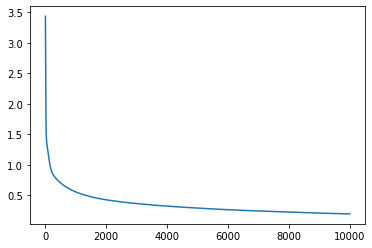

In [37]:
plt.plot(np.array(range(1,10001)),loss)

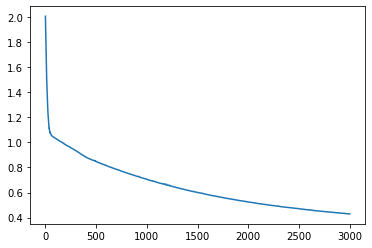

In [24]:
plt.plot(np.array(range(1,3001)),loss)

In [ ]:
session = tf.Session()
print(forward_propagation([[1.,1.,1.,1.]]))
#session.run(forward_propagation([[1.,1.,1.,1.]]))